## Quantitative Methods 2:  Data Science and Visualisation

## Workshop 7 : NLP Text Analysis. 

Today we'll be using the *Natural Language Tool Kit* package **nltk**, which will allow us to split (clean) text into words, parts of speech, and sentences, and plot word occurrence and frequency.

**Aims**

- to work with nltk and some standard corpus texts
- to tokenise by word and sentence
- to plot word occurrence and frequency
- to filter by parts of speech

## Downloading the Data
Let's grab the data we will need this week from our course website and save it into our data folder. If you've not already created a data folder then do so using the following command. 

Don't worry if it generates an error, that means you've already got a data folder.

In [1]:
!mkdir data

In [2]:
!mkdir data/wk7
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk7/PanelA.txt -o ./data/wk7/PanelA.txt
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk7/PanelA2.txt -o ./data/wk7/PanelA2.txt

mkdir: cannot create directory ‘data/wk7’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6374  100  6374    0     0  13334      0 --:--:-- --:--:-- --:--:-- 13306
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4091  100  4091    0     0   2563      0  0:00:01  0:00:01 --:--:--  2563


In [3]:
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)

## Dirty Words

Text often comes 'unclean' either containing tags such as HTML (or XML), or has other issues, but fortunately we will be using 'clean' sources, at least initially. Be cautious when committing to a text analysis project - you may spend a great deal of time tidying up your text.

The kind of analysis we will be doing reqires *tokenizing* a text, and *tagging* individual words. Tokenizing means splitting the text into individul sentences or individual words, while tagging means classifying each word according to a POS (Parts Of Speech) classification. 

## The Castle of Aaargh
We will first experiment with nltk and its built in corpus texts. We'll work with some Monty Python, beloved of comedy bores for half a century

## Setup

- install nltk through package manager, or the command line
- import nltk
- type nltk.download('book'). This will automatically download the books into our workspace

In [7]:
import nltk

In [8]:
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/ravi/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /home/ravi/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /home/ravi/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/ravi/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/ravi/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/ravi/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /home/ravi/nltk_data..

True

Now, we import the sample texts. You'll notice that text6 is "Monty Python and the Holy Grail", as promised. Presumably this was compiled pre-*Spamalot*.

In [9]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Let's look at the object text6; we can look at the first few words..

In [10]:
text6[1:10]

['1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop']

Which are presumably stage directions rather than dialogue. How many words/symbols are in the text?

In [11]:
len(text6)

16967

Bear in mind that a lot of the functions we will carry out rely on this being a text object - we'll start to think about how we use free text and convert it to a **Text** object later.

We can now start to do some slightly more sophisticated work; for example, a dispersion plot to see where words appear. Let's give it a few keywords that those familiar with *...The Holy Grail* might recognise:

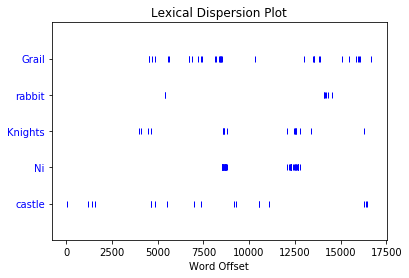

In [12]:
text6.dispersion_plot(['Grail','rabbit','Knights','Ni','castle'])

And we can easily count *how many* times a word appears.

In [13]:
text6.count('Ni')

47

Or the words which most commonly appear together:

In [14]:
text6.collocations()

BLACK KNIGHT; clop clop; HEAD KNIGHT; mumble mumble; Holy Grail;
squeak squeak; FRENCH GUARD; saw saw; Sir Robin; Run away; CARTOON
CHARACTER; King Arthur; Iesu domine; Pie Iesu; DEAD PERSON; Round
Table; clap clap; OLD MAN; dramatic chord; dona eis


## Exercise: From Hell's Heart I Stab at Thee
From Moby Dick, find out 
- Where the narrator Ishmael, Captain Ahab and his Nemesis are mentioned. When do each enter the story? Where do they have most emphasis?
- Which parts of the books appear to take place at sea, and points where their ship is wrecked or sinking (spoilers)
- two significant places in the story (HINT: use collocations)

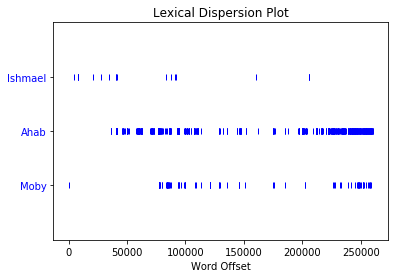

In [18]:
text1.dispersion_plot(['Ishmael', "Ahab", "Moby"])

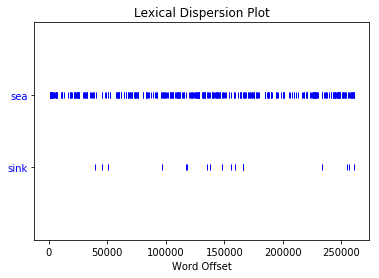

In [20]:
text1.dispersion_plot(['sea','sink'])

In [22]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


Let's now look at carrying out the full process of importing and working with text data. 

## Making an IMPACT

As part of the REF2014 exercise, universities reported on the *Impact* their research activities had on the world. Their *Impact Case Studies* were subsequently made available by HEFCE. What sort of information do they contain? How do universities frame "impact"? All of this data is available via the REF website.

A little context: I've included examples from the four *panels* used by HEFCE. Broadly speaking, Panel A is health, bioscience and medicine, B is physical science and engineering, C is social science, and D is humanities - the full categories are visible here: 
http://www.ref.ac.uk/panels/unitsofassessment/

Let's first look at random sample from Panel A:

In [24]:
data_path = "./data/wk7/PanelA.txt"

with open(data_path) as file:
    data = file.read()
print(data)

**** *title_inst_10000824-u_3-case_43396 *UKPRN_10000824 *uoa_3 *ID_43396 *panel_A 
Bournemouth University (BU) has facilitated improvements to health and social care practice through cultural change in care provision. Researchers developed a practice development framework for implementing and assessing the delivery of evidence-based practice in 82 UK health and social care units during the impact period. Benefits to staff include better communication and team structure. Benefits to patients include higher standards of cleanliness, privacy and dignity, as well as a decrease in length of hospital stays and appointment waiting times. Delivery has extended to cover entire NHS Trusts serving a resident population of over 3.5 million, social services departments and third sector organisations across the south of England and beyond. The research has since been applied to develop a similar system in Australia. BU's practice development approach is now widely used in England (R1) with further 

We could tokenize this into sentences:

In [25]:
sentences = nltk.sent_tokenize(data)
sentences[1:5]

['Researchers developed a practice development framework for implementing and assessing the delivery of evidence-based practice in 82 UK health and social care units during the impact period.',
 'Benefits to staff include better communication and team structure.',
 'Benefits to patients include higher standards of cleanliness, privacy and dignity, as well as a decrease in length of hospital stays and appointment waiting times.',
 'Delivery has extended to cover entire NHS Trusts serving a resident population of over 3.5 million, social services departments and third sector organisations across the south of England and beyond.']

Or into individual words; generally, it may be useful to retain sentences, so we can see where two words are in the same sentence, for example - but we'll be doing something simpler:

In [26]:
tokens = nltk.word_tokenize(data)

In [27]:
tokens[1:20]

['*title_inst_10000824-u_3-case_43396',
 '*UKPRN_10000824',
 '*uoa_3',
 '*ID_43396',
 '*panel_A',
 'Bournemouth',
 'University',
 '(',
 'BU',
 ')',
 'has',
 'facilitated',
 'improvements',
 'to',
 'health',
 'and',
 'social',
 'care',
 'practice']

Tokenising is a process which has many subtleties and corner-cases, and you may want to proceed in a more fine-grained way for some texts:

http://nltk.org/api/nltk.tokenize.html

Let's now convert this into a Text object, which will allow us to analyse other aspects of the text. For example, we can look at **collocations**, words which commonly appear together. This may help to provide context.

In [28]:
simple_text = nltk.Text(tokens)
simple_text.collocations()

practice development; Foundation Trust; NHS Foundation; 3.5 million;
Poole Hospital; Trusts serving; resident population; social care;
Hospital NHS; waiting times; action plan; development process; patient
privacy; user journey; better communication; cultural change; visiting
times; team members; services departments; evidence-based practice


We can create a dispersion plot - although in this case, it tells us a limited amount...

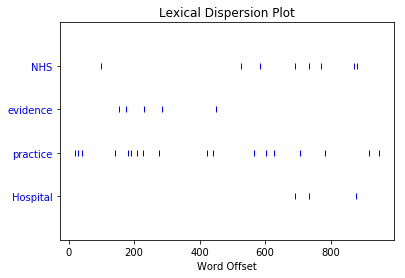

In [29]:
simple_text.dispersion_plot(['NHS', 'evidence', 'practice', 'Hospital'])

Even from this, we get a sense of the work this unit does, and its impacts on the world. But what are the most 20 common words used? To find this out, we produce a **Freq**uency **Dist**ribution (*FreqDist*) object. This has an implicit loop - the *for* statement is telling python to look through all the words in 'tokens' and seeing how often they occur. The .lower() command converts them all to lower case for comparison, so it will flag up upper *and* lower case occurrences of the word.

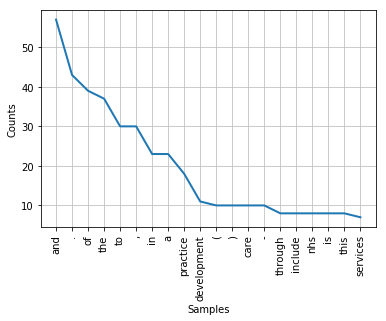

In [30]:
fd = nltk.FreqDist(word.lower() for word in tokens)
fd.plot(20)

Not very helpful - this includes all kinds of junk, and tells us that "and" is very common. Not very interesting. Let's try a bit harder and identify Parts of Speech.

## POS

Parts of speech indicate whether something is a noun, a verb, adjective, and so on. In nltk, we can use the *pos_tag* command, which will identify which word belongs to which part of speech.

In [31]:
tagged = nltk.pos_tag(tokens)
tagged[0:10]

[('****', 'JJ'),
 ('*title_inst_10000824-u_3-case_43396', 'JJ'),
 ('*UKPRN_10000824', 'NN'),
 ('*uoa_3', 'NNP'),
 ('*ID_43396', 'NNP'),
 ('*panel_A', 'NNP'),
 ('Bournemouth', 'NNP'),
 ('University', 'NNP'),
 ('(', '('),
 ('BU', 'NNP')]

'NNP' refers to Proper Noun, Singular; you can find the full list of Parts of Speech here: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [32]:
permitted_tags = set([
    'NN',
    'NNS'
])

## One FOR All
We've so far managed to avoid this staple of programming, the FOR loop - and we're not going to delve too deeply into it in the last class of term. Of course, you probably came across FOR loops and IF statements when you worked through the prerequisites for the module, but that feels like a long time ago... 

We do use FOR and IF here, and it's worth understanding a bit about what it means, even if you don't intend to use it a lot yourself. In the next piece of code, we set up *fd*, a new object which will record frequency distribution information. Then we use a FOR loop

`for bit in tagged:
    ...'

This goes through every element of tagged one at a time - and each element is called 'bit' for the purposes of this loop. Then, for each 'bit', we check that it has one of the permitted tags, and make sure it's at least 3 characters long - shorter words probably aren't all that relevant in this case:

`if bit[1] in permitted_tags and len(bit[0])>2:'

note that the *and* means both of these have to be true - if both *are* true, only then does the following statement execute:

`fd[bit[0]] = fd[bit[0]] + 1'

which increases the count for that word. So, this code increases the count for a word iff (if and only if) its at least 3 characters long, and it's of the correct tag (Noun, Singular or Plural).

## Double Indentity
One final remark: we haven't dealt with **indents** much in python, but indenting the code like below, after the for statement, and *again* after the if statement, is the way that python knows it's dealing with a loop (for) and a conditional (if). It's also the way python deals with defining new functions, but that's not something you will need to do. This is just a pointer - if your code doesn't work, check the colons are there (:) and the indenting is too.

On with the show - as promised, this creates a word frequency graph of nouns:

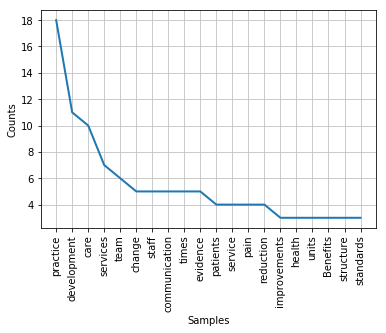

In [33]:
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1
        
fd.plot(20)

We start to get a sense of the impact - 'care', 'practice', and 'services' all feature heavily.

Let's now look at another randomly chosen example from Panel A:

practice development; Foundation Trust; NHS Foundation; 3.5 million;
Poole Hospital; Trusts serving; resident population; social care;
Hospital NHS; waiting times; action plan; development process; patient
privacy; user journey; better communication; cultural change; visiting
times; team members; services departments; evidence-based practice


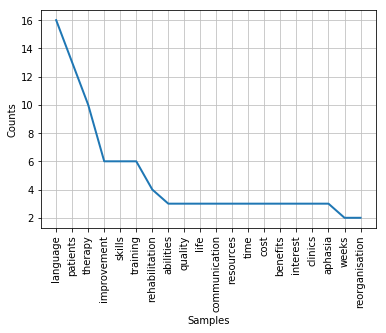

In [34]:
data_path = "./data/wk7/PanelA2.txt"

with open(data_path) as file:
    data = file.read()
tokens = nltk.word_tokenize(data)
simple_text.collocations()
simple_text = nltk.Text(tokens)
tagged = nltk.pos_tag(tokens)
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1
        
fd.plot(20)

A very different set of words, clearly geared towards language therapy, and working directly with patients. Perhaps if we looked at the *slightly* less common words, we'd see links between these submissions -  for example, we see *communication* appearing in both. Not a huge surprise, if we're talking about public impact, but students of the public role of the university might start to wonder about the distinctions between *communication* and *engagement*.

## Exercise
Repeat this for the examples from Panels B, C and D - what trends and keywords appear? What use do the collocations have? What do different parts of speech (e.g. verbs or proper nouns) tell you about the text?


ANSWER: No data for panels B, C and D neither from the link?


If we wanted to analyse the sector as a whole, we would want to analyse Impact statements en masse - and we would hope that this would draw out links across differnt statements from different centres and universities, and even in different panels.

## Working with larger text datasets
Working with larger text corpora starts to get slow. At this point, we will look at a body of text we have previously tagged up.  The file is "The Nameless City" by H. P. Lovecraft, a horror author from the early 20th century.

In [35]:
import pickle
import requests

This may take a little while - so wait for the asterisk to disappear:

In [36]:
# Loading the tokenized and tagged file. 
tagged = pickle.loads(
    requests.get('https://s3.eu-west-2.amazonaws.com/qm2/wk7/lovecraft_tagged.pickle').text)

# how many sentences do we have?
len(tagged)

ChunkedEncodingError: ('Connection broken: OSError("(104, \'ECONNRESET\')")', OSError("(104, 'ECONNRESET')"))

This is tokenised by sentence - and there are 18,513 of them. That would have taken a long time to tag up. If you're interested, this is how you take a set of *sentences* and tag them with Part of Speech:

In [ ]:
sentences = nltk.sent_tokenize(data)
  
tagged = [nltk.pos_tag(nltk.word_tokenize(sent)) for sent in sentences]

Note that the second line is running an implicit for loop through every sentence, and tagging each word.

In [ ]:
# first sentence.
tagged[0]

An impressive start! Let's again build our word frequency chart. Note now that we have an extra layer of FOR - we need to look at each sentence in the text; at each word in each sentence; and then check each word to see whether it is of an allowed type.

In [ ]:
fd = nltk.FreqDist()

permitted_tags = set([
    'JJS',
    'FW',
    'NN',
    'NNS',
    'NNP',
    'NNPS',
    'UH',
])
for sentence in tagged:
    for word in sentence:
        if word[1] in permitted_tags:
                fd[word[0]] = fd[word[0]] + 1
fd.plot(20)

Now that we've produced counts for all words which conform to our list of tags, we can quickly see how frequently common words appear; because we have tokenized by sentence, we have to do this with a slightly different mechanism - run through the words of interest and see how many occurrences appear in the Frequency Distribution object, fd. Again, we're sneaking in a FOR loop to run through these.

In [ ]:
for word in ['space', 'nameless', 'mad', 'dread', 'fear', 'cthulhu', 'necronomicon', 'caring']:
    print word, fd[word]

So far, we've completely avoided the use of pandas - but we can put this data into a pandas dataframe very easily, and use the built-in graphing methods to change the style of our graph. 

We feed in fd.keys() - the words - and fd.values(), the wordcount.

In [ ]:
fd.keys()[1:10]

In [ ]:
fd.values()[1:10]

In [ ]:
import pandas as pd

df = pd.DataFrame({'items': fd.keys(), 'counts': fd.values()})
df.head()

Let's now arrange them in order of appearance - the most common at the top.

In [ ]:
df = df.sort_values(by='counts',ascending=False)
df.head()

We now have a DataFrame with certain word tags sorted by decreasing frequency. Let's plot this in a bar graph; we will use df[1:50] to select the most common 50 words.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('ggplot')
df[1:50].plot(kind='bar', x='items', y='counts', legend=False)
plt.xlabel('Word')
plt.ylabel('Word Count')
plt.title('Word counts for H.P. Lovecraft\'s \"The Nameless City\"')
plt.axhline(df['counts'].mean(), color='#2222ff')

## Exercise
What is the percentage of words that appear exactly once in the entire text? (Hint : FreqDist objects have a method called 'hapaxes')

## Exercise
The words of our dear, recently departed, Prime Minister, David Cameron:

    1. Select one of Cameron's speeches.
    2. Sentence and word tokenize it.
    3. POS tag it.
    4. Create noun and adjective histograms of the 20 most frequent words.
    (notice that there are several POS for each.)
    5. Create dispersion plots for these nouns and adjectives. 
    6. What is the percentage of words that are adjectives in the speech?

In [ ]:
# read a raw text from a remote location. 
speech = requests.get('https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2006a.txt').text

### Speeches

https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-election-victory-speech-2010.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2006a.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2006b.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2007.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2008.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2013.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2012.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2011.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2010.txt  
https://s3.eu-west-2.amazonaws.com/qm2/wk7/speeches/cameron-leaders-speech-2009.txt  

In [ ]:
speech